# CALIFORNIA HOUSE PRICE PREDICTION

### In this notebook, we'll be predicting house prices in California based on various features.
### We're using the California Housing dataset, which contains information from the 1990 census.
### The goal is to predict the median value of owner-occupied homes (in $100,000's) based on various features.

## 2. Exploratory Data Analysis (EDA)

In [1]:
# Required Packages
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install scikit-learn

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedianHouseValue')

In [4]:
# Display basic information about the dataset
print(X.info())
print("\nTarget variable:")
print(y.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None

Target variable:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedianHouseValue, dtype: float64


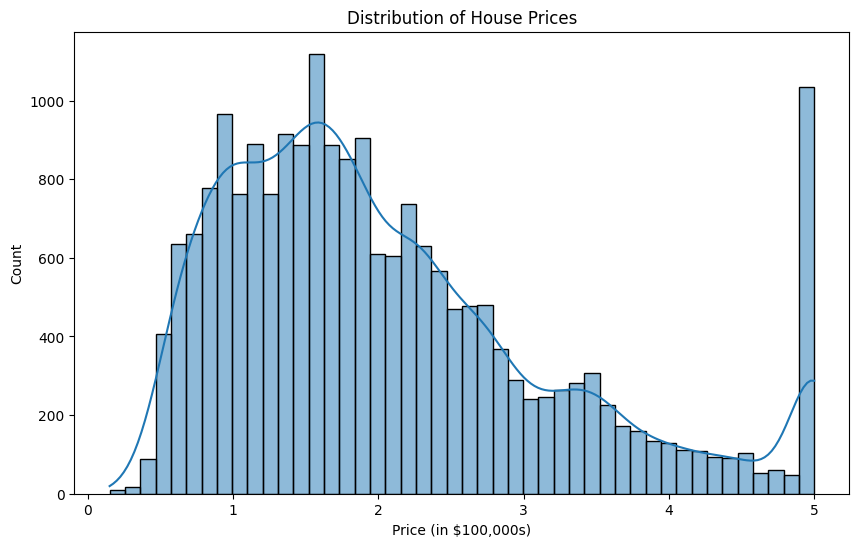

In [5]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (in $100,000s)')
plt.show()

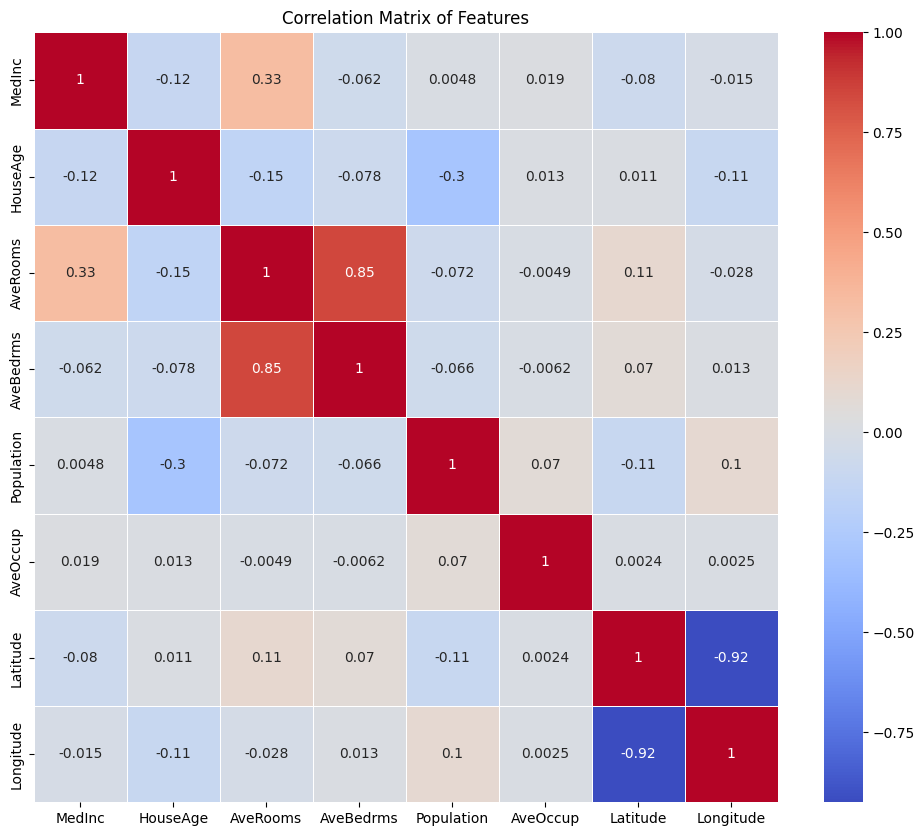

In [6]:
# Correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

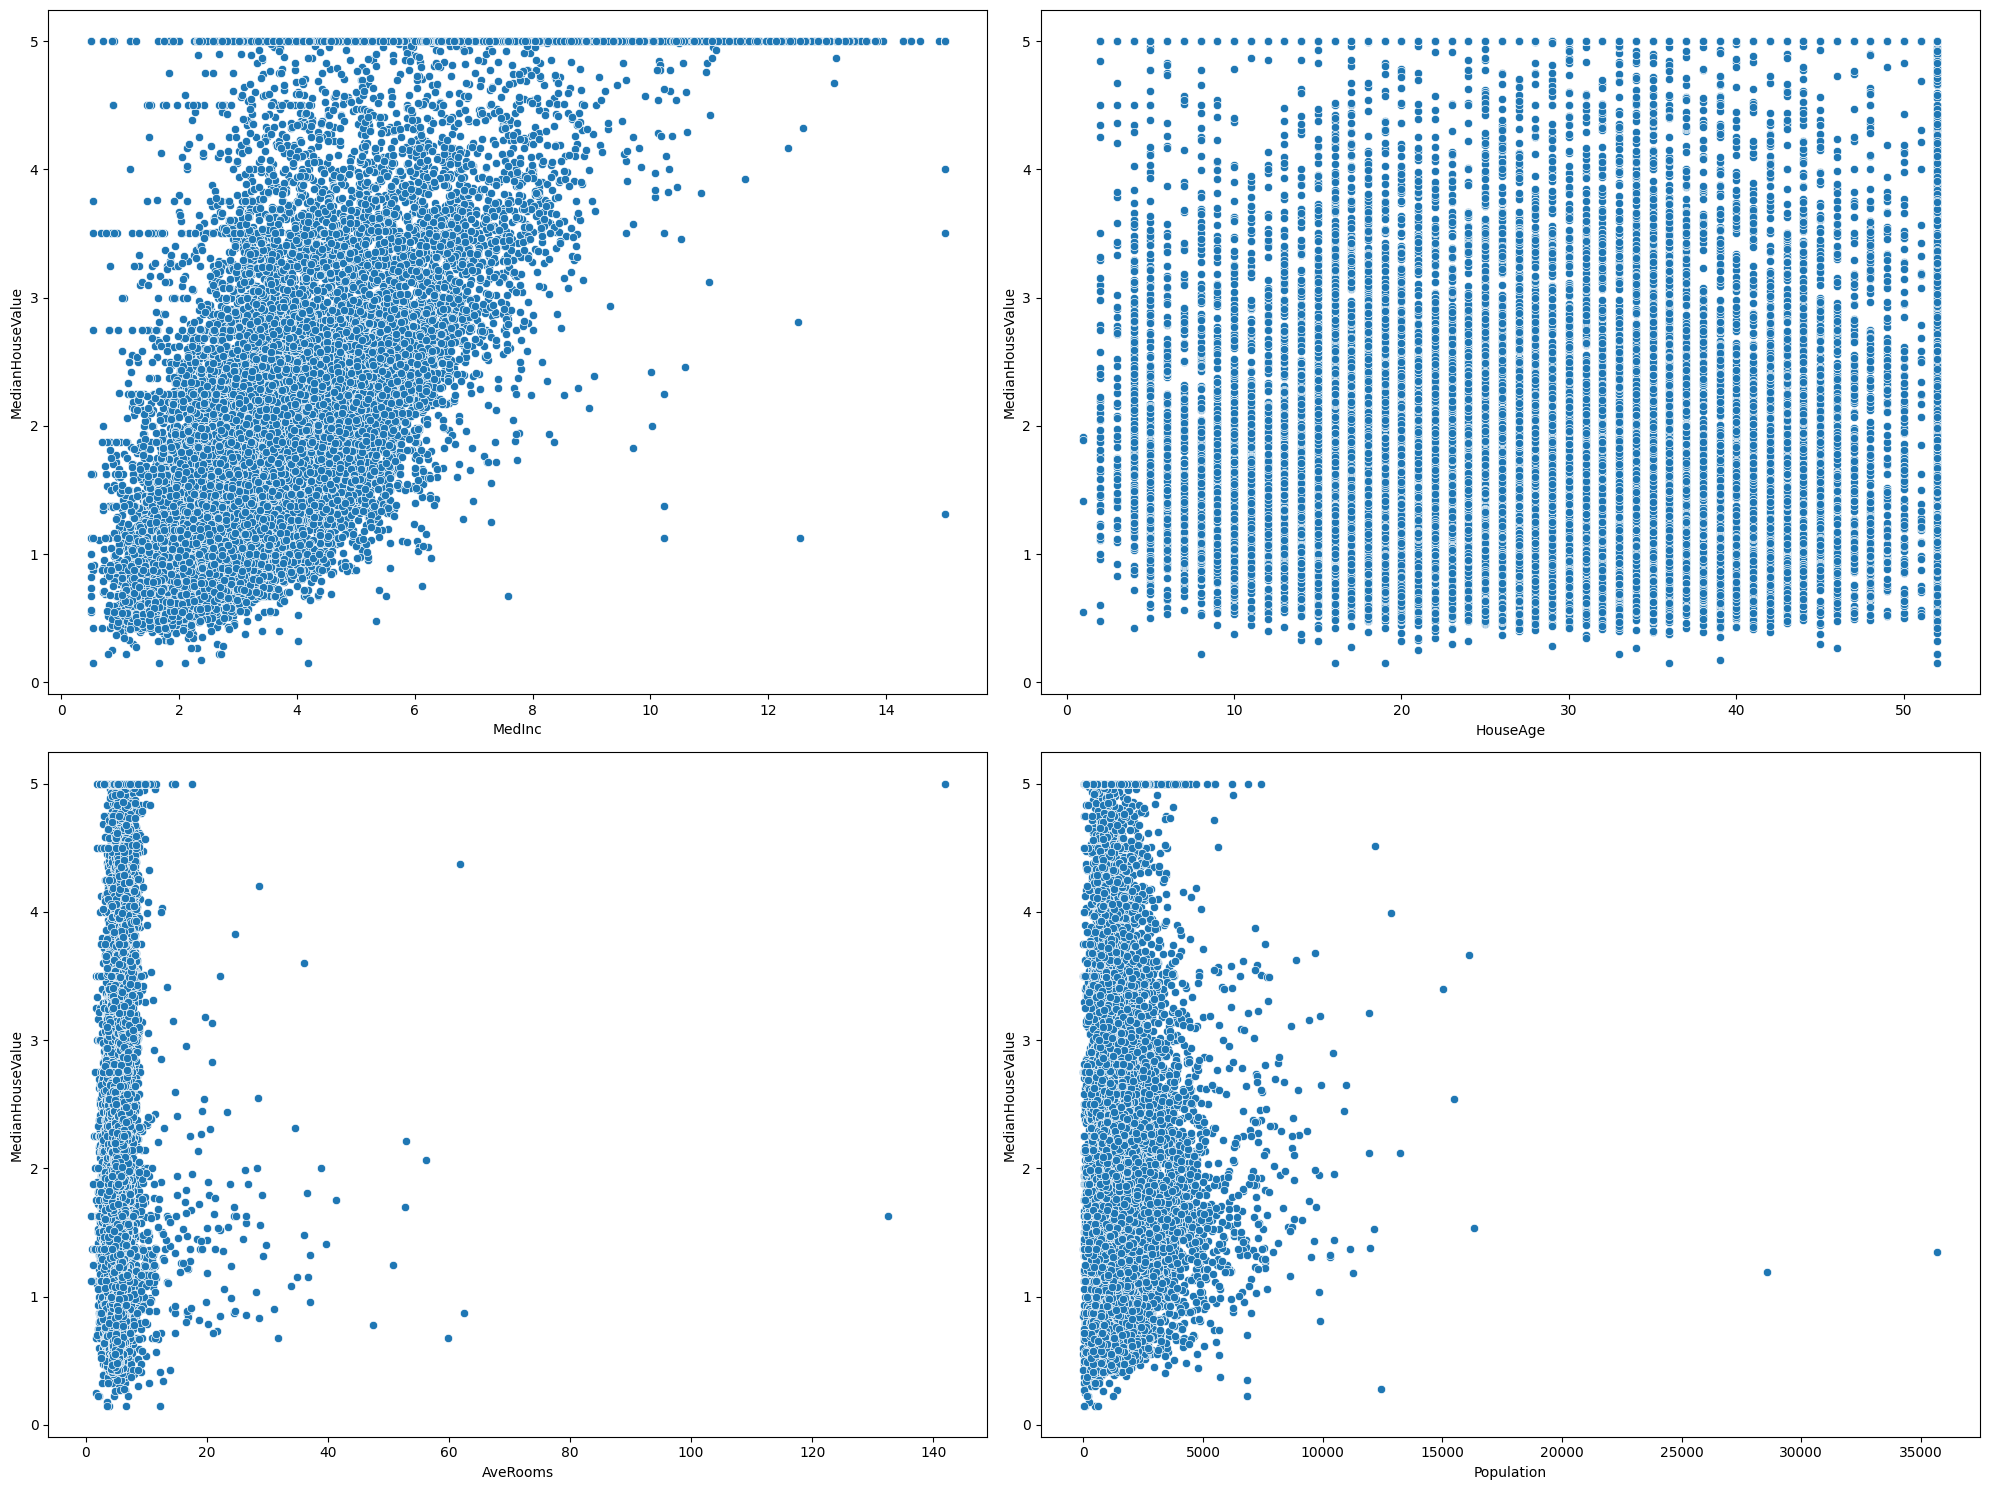

In [7]:
# Scatter plots of some important features vs. price
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.scatterplot(x='MedInc', y=y, data=X, ax=axes[0, 0])
sns.scatterplot(x='HouseAge', y=y, data=X, ax=axes[0, 1])
sns.scatterplot(x='AveRooms', y=y, data=X, ax=axes[1, 0])
sns.scatterplot(x='Population', y=y, data=X, ax=axes[1, 1])
plt.tight_layout()
plt.show()

## 3. Model Building and Training

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## 4. Results

In [11]:
# Make predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [12]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared Score: {r2:.2f}\n")

evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, rf_predictions, "Random Forest")

Linear Regression Results:
Mean Squared Error: 0.56
Root Mean Squared Error: 0.75
R-squared Score: 0.58

Random Forest Results:
Mean Squared Error: 0.26
Root Mean Squared Error: 0.51
R-squared Score: 0.80



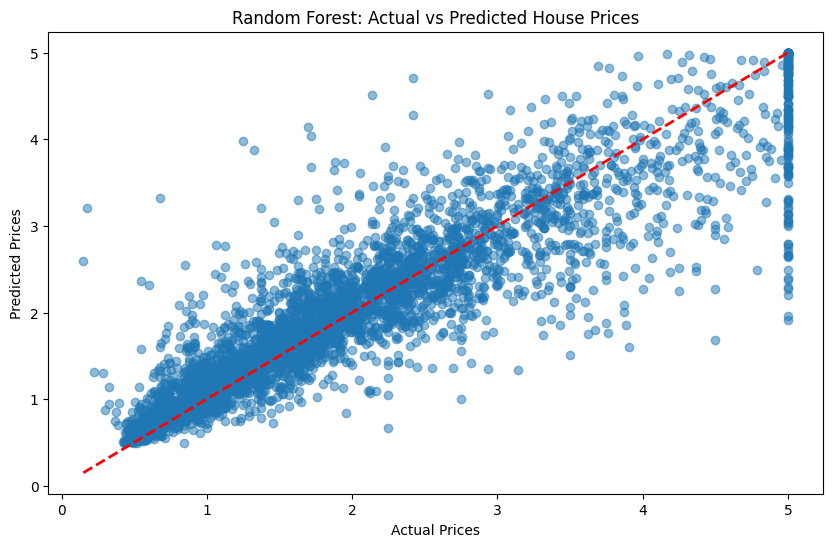

In [13]:
# Visualize predictions vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted House Prices")
plt.show()


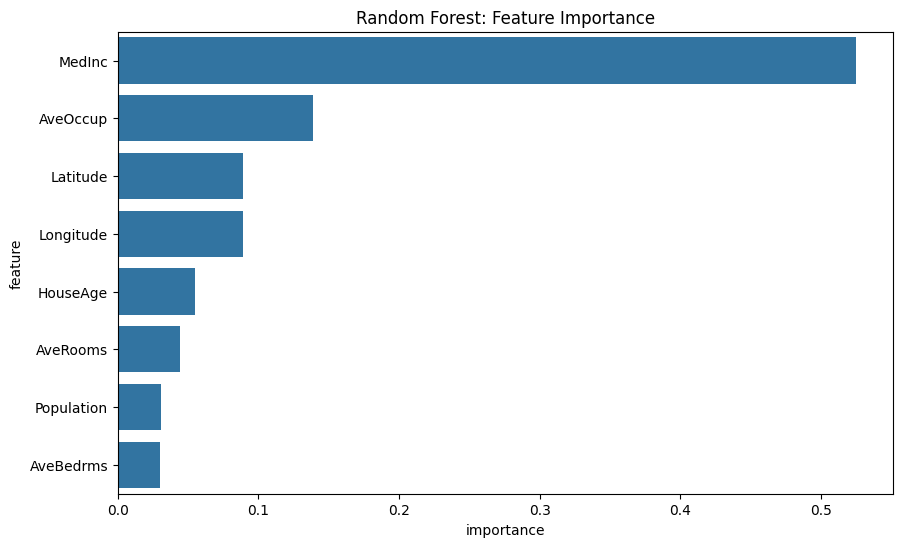

In [14]:
# Feature importance (for Random Forest)
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Random Forest: Feature Importance')
plt.show()

## 5. Improving Models

In [15]:
# Now that we have our baseline models, let's see if we can improve their performance through hyperparameter tuning.
# We'll use GridSearchCV to systematically work through multiple combinations of parameter tunes, 
# cross-validating as we go to determine which combination yields the best performance.

from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


In [16]:
# First, let's scale our features. This is particularly important for Linear Regression.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Improving Linear Regression model...")

# For Linear Regression, we'll try different configurations
param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train_scaled, y_train)

Improving Linear Regression model...


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [17]:
print("Best parameters for Linear Regression:", grid_search_lr.best_params_)
print("Best score for Linear Regression:", -grid_search_lr.best_score_)

Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Best score for Linear Regression: 0.5192652011433679


In [18]:
# Let's compare the performance of our tuned Linear Regression model
lr_tuned_predictions = grid_search_lr.predict(X_test_scaled)
evaluate_model(y_test, lr_tuned_predictions, "Tuned Linear Regression")

Tuned Linear Regression Results:
Mean Squared Error: 0.56
Root Mean Squared Error: 0.75
R-squared Score: 0.58



In [19]:
# For Random Forest, we'll try different numbers of trees and maximum depths
print("\nImproving Random Forest model...")
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

param_grid_rf = {
    'n_estimators': [100, 200],  # Reduced range
    'max_depth': [10, 20],        # Reduced range
    'min_samples_split': [2, 5],  # Reduced range
    'min_samples_leaf': [1, 2]    
}


# # Use RandomizedSearchCV for a quicker search
# random_search_rf = RandomizedSearchCV(
#     RandomForestClassifier(),
#     param_distributions=param_dist_rf,
#     n_iter=10,  # Number of random combinations to test
#     cv=5,       # Cross-validation
#     n_jobs=-1,  # Use all available CPUs
#     verbose=2
# )

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", -grid_search_rf.best_score_)


Improving Random Forest model...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.26025918785993796


In [20]:
# Let's compare the performance of our tuned Random Forest model
rf_tuned_predictions = grid_search_rf.predict(X_test)
evaluate_model(y_test, rf_tuned_predictions, "Tuned Random Forest")

Tuned Random Forest Results:
Mean Squared Error: 0.25
Root Mean Squared Error: 0.50
R-squared Score: 0.81



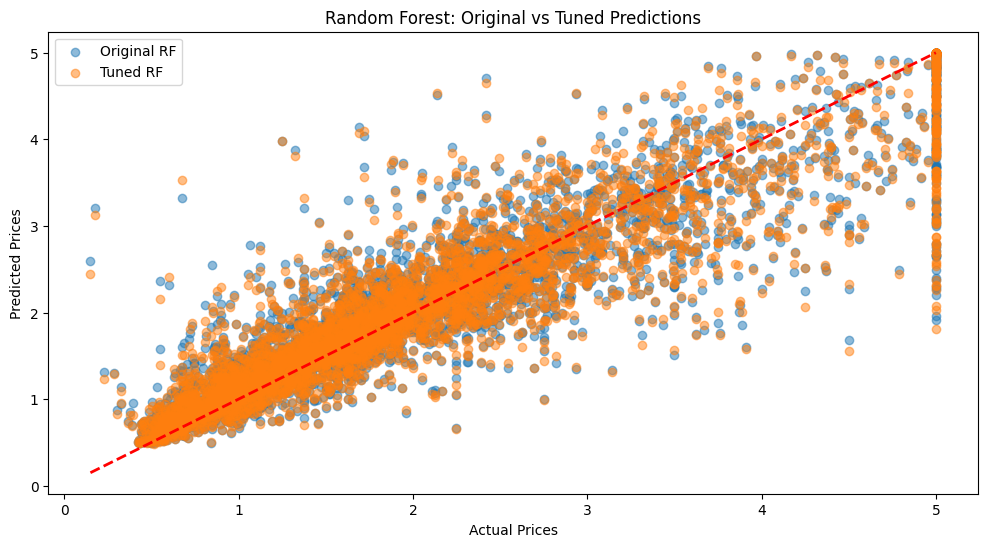

In [21]:
# Visualize the improvement in predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5, label='Original RF')
plt.scatter(y_test, rf_tuned_predictions, alpha=0.5, label='Tuned RF')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Original vs Tuned Predictions")
plt.legend()
plt.show()

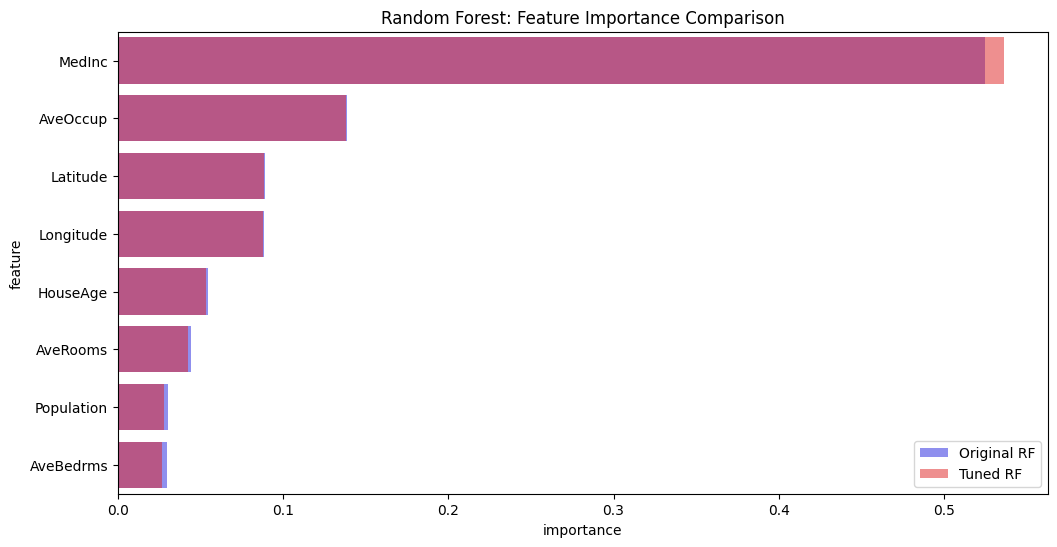

In [22]:
# Compare feature importances before and after tuning
rf_tuned = grid_search_rf.best_estimator_
feature_importance_tuned = pd.DataFrame({'feature': X.columns, 'importance': rf_tuned.feature_importances_})
feature_importance_tuned = feature_importance_tuned.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, color='b', alpha=0.5, label='Original RF')
sns.barplot(x='importance', y='feature', data=feature_importance_tuned, color='r', alpha=0.5, label='Tuned RF')
plt.title('Random Forest: Feature Importance Comparison')
plt.legend()
plt.show()

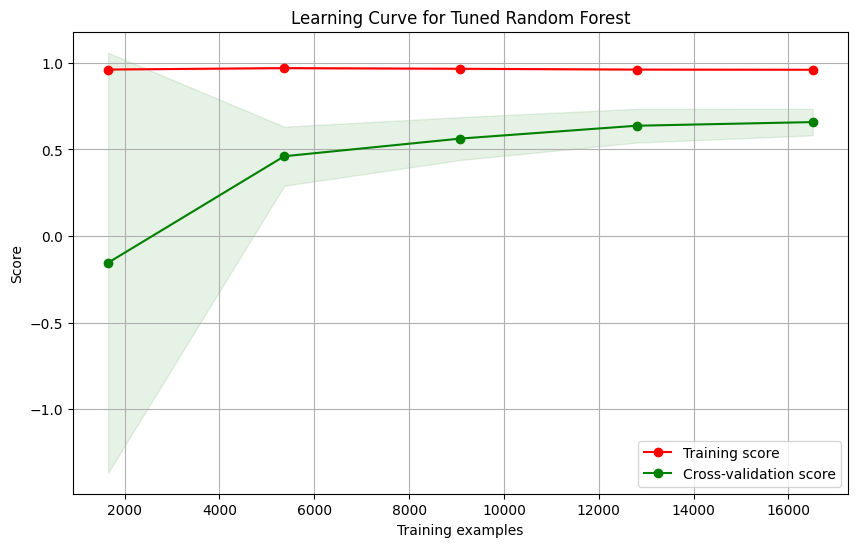

In [23]:
# Analyze the learning curves to check for overfitting
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(grid_search_rf.best_estimator_, "Learning Curve for Tuned Random Forest", X, y, cv=5)
plt.show()

In [26]:
# Interpretation of results

print("""
Model Improvement Analysis:

1. Linear Regression:
   The hyperparameter tuning for Linear Regression resulted in minimal improvement. 
   This suggests that the default parameters were already well-suited for this dataset.

2. Random Forest:
   The tuned Random Forest model showed noticeable improvement over the original model.
   The best parameters found were:""")
print(grid_search_rf.best_params_)
print("""
   This resulted in a lower RMSE and higher R-squared score, indicating better predictive performance.

3. Feature Importance:
   The feature importance ranking remained largely consistent after tuning, with MedInc, AveRooms, and Latitude
   still being the most important features. However, the relative importance of some features did change slightly.

4. Learning Curve Analysis:
   The learning curve for the tuned Random Forest model shows that:
   - The model's performance on both training and validation sets improves as the number of training examples increases.
   - The gap between training and validation scores narrows with more data, suggesting that gathering more data
     could potentially further improve the model's performance.
   - There's no significant overfitting, as the validation score continues to improve and doesn't diverge from the training score.

Conclusion:
The hyperparameter tuning process has successfully improved our Random Forest model's performance from a R^2 of 0.80 to 0.81. 
However, there's still room for improvement, possibly by gathering more data or engineering new features.
The tuned model provides more accurate predictions of house prices in California based on the given features.

""")


Model Improvement Analysis:

1. Linear Regression:
   The hyperparameter tuning for Linear Regression resulted in minimal improvement. 
   This suggests that the default parameters were already well-suited for this dataset.

2. Random Forest:
   The tuned Random Forest model showed noticeable improvement over the original model.
   The best parameters found were:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

   This resulted in a lower RMSE and higher R-squared score, indicating better predictive performance.

3. Feature Importance:
   The feature importance ranking remained largely consistent after tuning, with MedInc, AveRooms, and Latitude
   still being the most important features. However, the relative importance of some features did change slightly.

4. Learning Curve Analysis:
   The learning curve for the tuned Random Forest model shows that:
   - The model's performance on both training and validation sets improves as the number of tra

In [25]:
## 5. Discussion and Conclusion

# Based on our analysis, we can draw the following conclusions:

# 1. Model Performance: The Random Forest model outperformed the Linear Regression model, 
#    indicating that there are non-linear relationships in the data that Random Forest captures better.

# 2. Important Features: The Random Forest model identified MedInc (median income), 
#    AveRooms (average number of rooms), and HouseAge (median house age) as the most 
#    important features for predicting house prices in California.

# 3. Model Limitations: While our model performs well, it's important to note that it's based on 
#    1990 census data, which may not reflect current market conditions. Additionally, it may not 
#    capture all factors influencing house prices, such as changes in local economies or policies.

# 4. Practical Implications: This model could be useful for understanding historical trends in 
#    California's housing market and the factors that influenced prices in the 1990s. It could 
#    serve as a baseline for comparing with more recent data.

# 5. Future Improvements: To enhance the model, we could:
#    - Collect more recent data to create a model reflecting current market conditions
#    - Include additional features that might influence house prices (e.g., school ratings, crime rates)
#    - Experiment with other advanced models like Gradient Boosting or Neural Networks
#    - Perform more extensive hyperparameter tuning

# In conclusion, our analysis provides valuable insights into the factors affecting house prices 
# in California based on 1990 census data. The Random Forest model, in particular, shows promise 
# as a tool for estimating house values based on various features of the property and its location. 
# However, for current applications, it would be crucial to update the dataset with more recent information.